In [47]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVR

import matplotlib.pyplot as plt
import numpy as np

In [48]:
df = pd.read_csv('Resources/sales.csv')
df.head()

,Date,Store,Product,Is_Holiday,Base Price,Price,Weekly_Units_Sold,weekly_sales,year,month,day,week_of_year,promotion
0,2010-02-05,1,1,False,9.99,7.99,245,1957.55,2010,2,5,5,1
1,2010-02-12,1,1,True,9.99,7.99,453,3619.47,2010,2,12,6,1
2,2010-02-19,1,1,False,9.99,7.99,409,3267.91,2010,2,19,7,1
3,2010-02-26,1,1,False,9.99,7.99,191,1526.09,2010,2,26,8,1
4,2010-03-05,1,1,False,9.99,9.99,145,1448.55,2010,3,5,9,0


In [49]:
df=df.drop(columns=['Date', 'year', 'day', 'month','weekly_sales'])
df.head()

,Store,Product,Is_Holiday,Base Price,Price,Weekly_Units_Sold,week_of_year,promotion
0,1,1,False,9.99,7.99,245,5,1
1,1,1,True,9.99,7.99,453,6,1
2,1,1,False,9.99,7.99,409,7,1
3,1,1,False,9.99,7.99,191,8,1
4,1,1,False,9.99,9.99,145,9,0


In [50]:
df=df[['Store','Product','week_of_year','Base Price','Price','promotion','Is_Holiday','Weekly_Units_Sold']]
df.head()

,Store,Product,week_of_year,Base Price,Price,promotion,Is_Holiday,Weekly_Units_Sold
0,1,1,5,9.99,7.99,1,False,245
1,1,1,6,9.99,7.99,1,True,453
2,1,1,7,9.99,7.99,1,False,409
3,1,1,8,9.99,7.99,1,False,191
4,1,1,9,9.99,9.99,0,False,145


In [51]:
df['Temp']='_'
df['Store'] = df['Temp'].str.cat(df['Store'].values.astype(str))
df.head()

,Store,Product,week_of_year,Base Price,Price,promotion,Is_Holiday,Weekly_Units_Sold,Temp
0,_1,1,5,9.99,7.99,1,False,245,_
1,_1,1,6,9.99,7.99,1,True,453,_
2,_1,1,7,9.99,7.99,1,False,409,_
3,_1,1,8,9.99,7.99,1,False,191,_
4,_1,1,9,9.99,9.99,0,False,145,_


In [52]:
del df['Temp']
df

,Store,Product,week_of_year,Base Price,Price,promotion,Is_Holiday,Weekly_Units_Sold
0,_1,1,5,9.99,7.99,1,False,245
1,_1,1,6,9.99,7.99,1,True,453
2,_1,1,7,9.99,7.99,1,False,409
3,_1,1,8,9.99,7.99,1,False,191
4,_1,1,9,9.99,9.99,0,False,145
...,...,...,...,...,...,...,...,...
3856,_10,3,39,19.99,19.99,0,False,133
3857,_10,3,40,19.99,19.99,0,False,133
3858,_10,3,41,19.99,19.99,0,False,127
3859,_10,3,42,19.99,19.99,0,False,133


In [53]:
df['Temp']='_'
df['Product'] = df['Temp'].str.cat(df['Product'].values.astype(str))
df.head()

,Store,Product,week_of_year,Base Price,Price,promotion,Is_Holiday,Weekly_Units_Sold,Temp
0,_1,_1,5,9.99,7.99,1,False,245,_
1,_1,_1,6,9.99,7.99,1,True,453,_
2,_1,_1,7,9.99,7.99,1,False,409,_
3,_1,_1,8,9.99,7.99,1,False,191,_
4,_1,_1,9,9.99,9.99,0,False,145,_


In [54]:
del df['Temp']
df

,Store,Product,week_of_year,Base Price,Price,promotion,Is_Holiday,Weekly_Units_Sold
0,_1,_1,5,9.99,7.99,1,False,245
1,_1,_1,6,9.99,7.99,1,True,453
2,_1,_1,7,9.99,7.99,1,False,409
3,_1,_1,8,9.99,7.99,1,False,191
4,_1,_1,9,9.99,9.99,0,False,145
...,...,...,...,...,...,...,...,...
3856,_10,_3,39,19.99,19.99,0,False,133
3857,_10,_3,40,19.99,19.99,0,False,133
3858,_10,_3,41,19.99,19.99,0,False,127
3859,_10,_3,42,19.99,19.99,0,False,133


In [55]:
df['Temp']='_'
df['week_of_year'] = df['Temp'].str.cat(df['week_of_year'].values.astype(str))
del df['Temp']
df.head()

,Store,Product,week_of_year,Base Price,Price,promotion,Is_Holiday,Weekly_Units_Sold
0,_1,_1,_5,9.99,7.99,1,False,245
1,_1,_1,_6,9.99,7.99,1,True,453
2,_1,_1,_7,9.99,7.99,1,False,409
3,_1,_1,_8,9.99,7.99,1,False,191
4,_1,_1,_9,9.99,9.99,0,False,145


In [56]:
#  LabelEncoding Is_Holiday column
df['Is_Holiday']=LabelEncoder().fit_transform(df['Is_Holiday'])
df.head()

,Store,Product,week_of_year,Base Price,Price,promotion,Is_Holiday,Weekly_Units_Sold
0,_1,_1,_5,9.99,7.99,1,0,245
1,_1,_1,_6,9.99,7.99,1,1,453
2,_1,_1,_7,9.99,7.99,1,0,409
3,_1,_1,_8,9.99,7.99,1,0,191
4,_1,_1,_9,9.99,9.99,0,0,145


In [57]:
df.to_csv("Resources/preprocessed.csv")

In [58]:
sc1=df[df['Product']=='_1']
sc2=df[df['Product']=='_2']
sc3=df[df['Product']=='_3']

In [189]:
# Create features
X=sc3.drop(columns=['Weekly_Units_Sold'], axis = 1)

X=pd.get_dummies(X)

# Create target. 
y = sc3['Weekly_Units_Sold']

In [190]:
X

,Base Price,Price,promotion,Is_Holiday,Store__1,Store__10,Store__2,Store__3,Store__4,Store__5,...,week_of_year__48,week_of_year__49,week_of_year__5,week_of_year__50,week_of_year__51,week_of_year__52,week_of_year__6,week_of_year__7,week_of_year__8,week_of_year__9
286,19.99,19.99,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
287,19.99,19.99,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
288,19.99,19.99,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
289,19.99,19.99,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
290,19.99,19.99,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3856,19.99,19.99,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3857,19.99,19.99,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3858,19.99,19.99,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3859,19.99,19.99,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [191]:
X.describe()

,Base Price,Price,promotion,Is_Holiday,Store__1,Store__10,Store__2,Store__3,Store__4,Store__5,...,week_of_year__48,week_of_year__49,week_of_year__5,week_of_year__50,week_of_year__51,week_of_year__52,week_of_year__6,week_of_year__7,week_of_year__8,week_of_year__9
count,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,...,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000
mean,20.717273,19.117413,0.153846,0.069930,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,...,0.013986,0.013986,0.020979,0.013986,0.013986,0.013986,0.020979,0.020979,0.020979,0.020979
std,0.962465,3.822572,0.360941,0.255128,0.314392,0.314392,0.314392,0.314392,0.314392,0.314392,...,0.117478,0.117478,0.143370,0.117478,0.117478,0.117478,0.143370,0.143370,0.143370,0.143370
min,19.990000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.990000,19.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.990000,19.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.990000,21.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21.990000,21.990000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Linear Regression

In [192]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [193]:
# Create and train the model
model = LinearRegression().fit(X_train_scaled, y_train)

# Generate predictions
y_pred = model.predict(X_test_scaled)


In [194]:
#  Score Data
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

score = r2_score(y_test, y_pred)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print('---------------------')
print(f"R2 Score: {score}")

Training Score: 0.634189732403384
Testing Score: 0.44620427152990716
---------------------
R2 Score: 0.44620427152990716


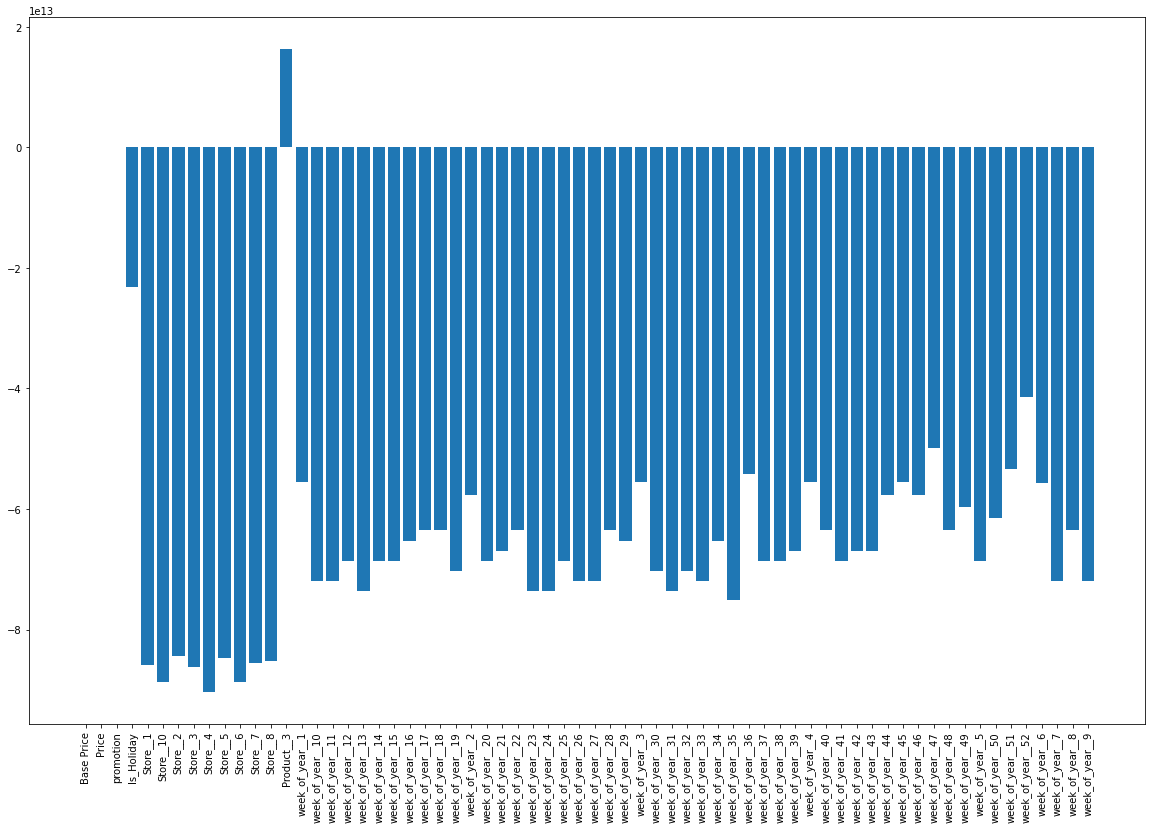

In [195]:
# Visualizing the regression coefficients. 
plt.rcParams["figure.figsize"] = (20,13)
plt.xticks(rotation=90)
plt.bar(X_train.columns, model.coef_,)
plt.show()

## Lasso Regression 

In [196]:
# Create and train the model
model = Lasso(max_iter=10000).fit(X_train_scaled, y_train)

# Generate predictions
y_pred = model.predict(X_test_scaled)


In [197]:
#  Score Data
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

score = r2_score(y_test, y_pred)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print('---------------------')
print(f"R2 Score: {score}")

Training Score: 0.6285707950065009
Testing Score: 0.47396446151470073
---------------------
R2 Score: 0.47396446151470073


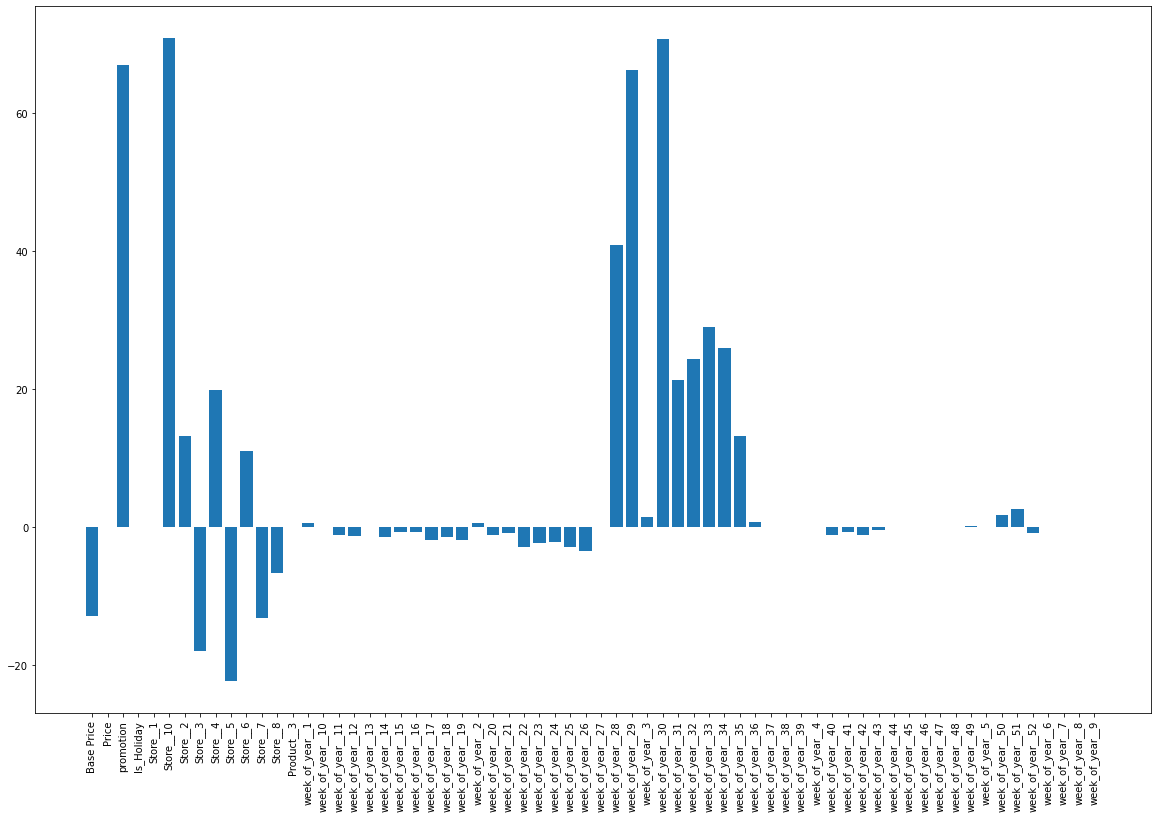

In [198]:
# Visualizing the regression coefficients. 
plt.rcParams["figure.figsize"] = (20,13)
plt.xticks(rotation=90)
plt.bar(X_train.columns, model.coef_)
plt.show()

## Ridge

In [199]:
# Create and train the model
model = Ridge(alpha=100).fit(X_train_scaled, y_train)

# Generate predictions
y_pred = model.predict(X_test_scaled)

In [200]:
#  Score Data
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

score = r2_score(y_test, y_pred)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print('---------------------')
print(f"R2 Score: {score}")

Training Score: 0.6255202086981164
Testing Score: 0.5064363144775736
---------------------
R2 Score: 0.5064363144775736


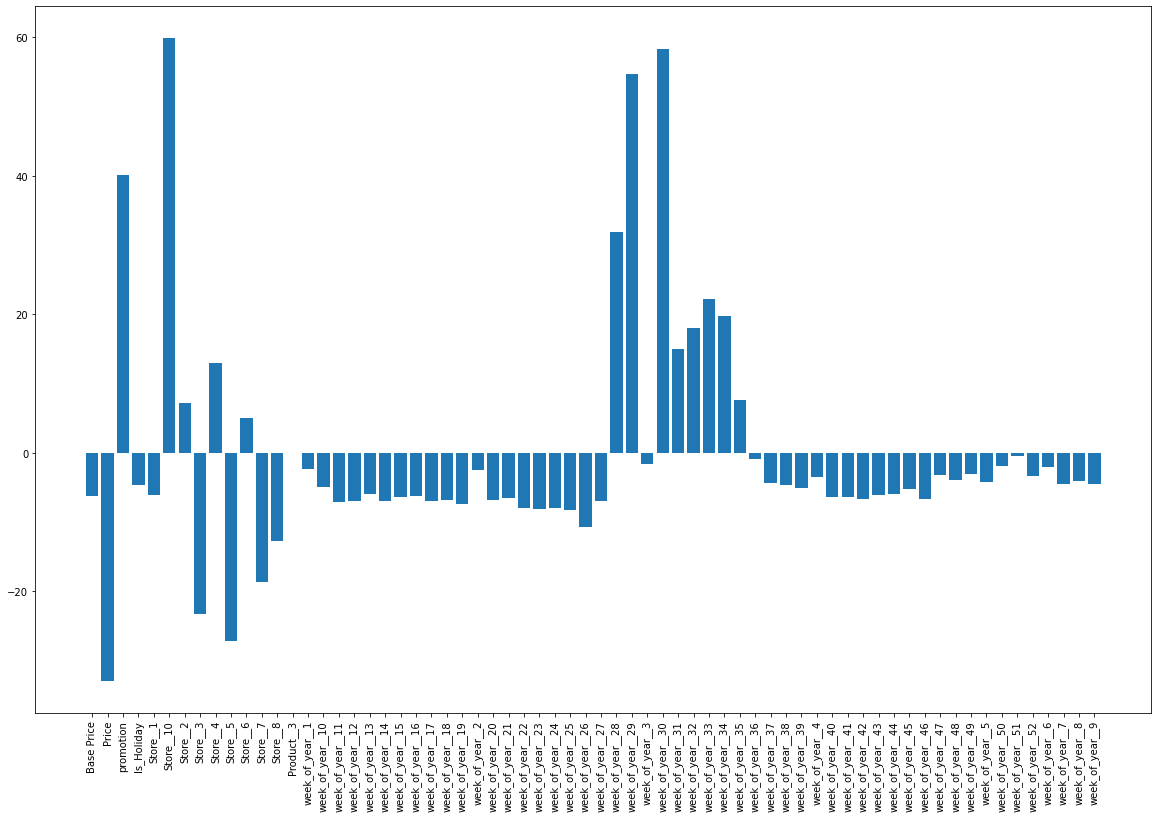

In [201]:
# Visualizing the regression coefficients. 
plt.rcParams["figure.figsize"] = (20,13)
plt.xticks(rotation=90)
plt.bar(X_train.columns, model.coef_)
plt.show()

## ElasticNet

In [202]:
# Create and train the model
model = ElasticNet(alpha=10).fit(X_train_scaled, y_train)

# Generate predictions
y_pred = model.predict(X_test_scaled)

In [203]:
#  Score Data
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

score = r2_score(y_test, y_pred)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print('---------------------')
print(f"R2 Score: {score}")

Training Score: 0.25886454807199055
Testing Score: 0.3141372241641497
---------------------
R2 Score: 0.3141372241641497


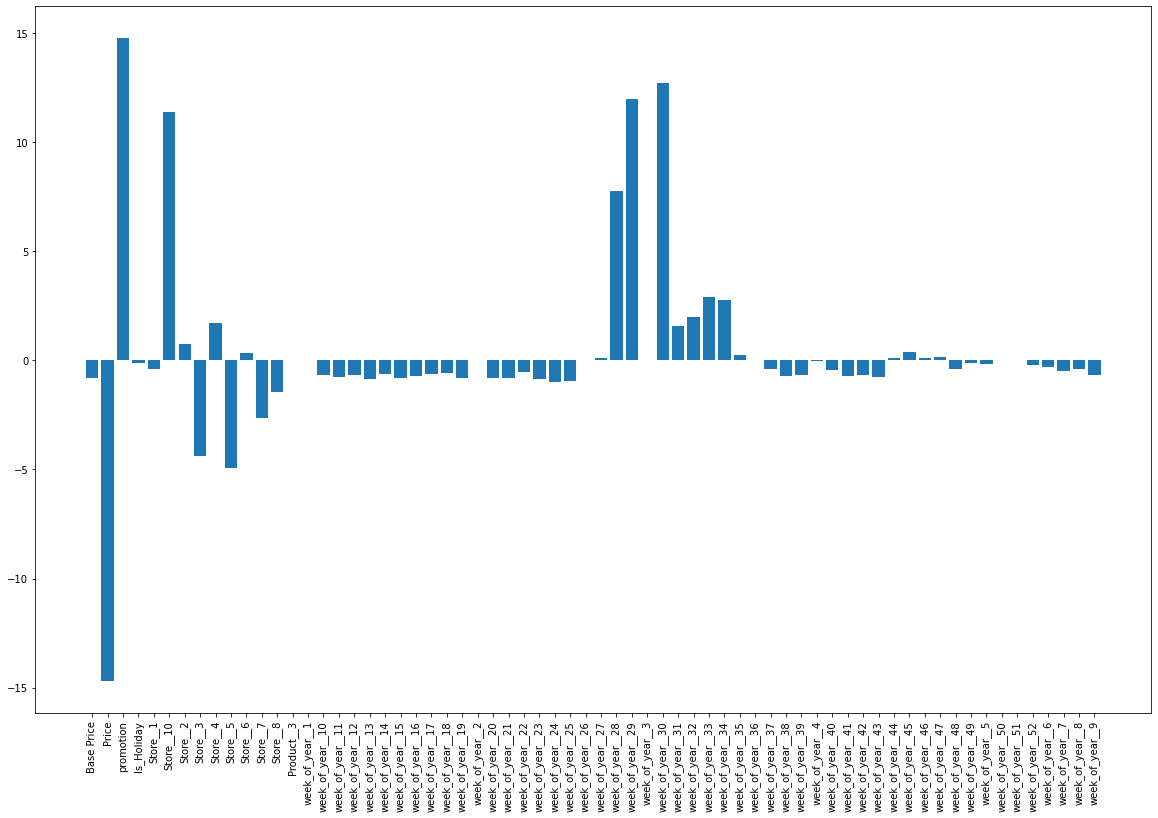

In [204]:
# Visualizing the regression coefficients. 
plt.rcParams["figure.figsize"] = (20,13)
plt.xticks(rotation=90)
plt.bar(X_train.columns, model.coef_)
plt.show()

In [205]:
from sklearn.linear_model import LinearRegression

In [206]:
model=LinearRegression()
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

0.634189732403384
0.44620427152990716
66.40666023977217
0.44620427152990716


In [207]:
# !pip install lightgbm --quiet

## LGBM Regressor

In [208]:
from lightgbm import LGBMRegressor

In [209]:
model=LGBMRegressor()
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

0.6615609028193197
0.671462341501261
48.16415621360376
0.671462341501261


## XGBoost Regressor

In [210]:
from xgboost.sklearn import XGBRegressor

In [211]:
model=XGBRegressor()
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

0.9914275934018283
0.8120795608309641
21.80832105356714
0.8120795608309641


## CatBoost Regressor

In [212]:
!pip install catboost --quiet

In [213]:
from catboost import CatBoostRegressor

In [214]:
model= CatBoostRegressor()
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

Learning rate set to 0.040713
0:	learn: 224.4246907	total: 1.23ms	remaining: 1.22s
1:	learn: 220.1944811	total: 2.33ms	remaining: 1.16s
2:	learn: 215.9305101	total: 3.58ms	remaining: 1.19s
3:	learn: 212.0743624	total: 4.47ms	remaining: 1.11s
4:	learn: 208.1082016	total: 5.59ms	remaining: 1.11s
5:	learn: 204.4991587	total: 6.68ms	remaining: 1.11s
6:	learn: 201.0655829	total: 7.79ms	remaining: 1.1s
7:	learn: 197.7025119	total: 8.64ms	remaining: 1.07s
8:	learn: 194.8144720	total: 9.55ms	remaining: 1.05s
9:	learn: 191.5372718	total: 10.6ms	remaining: 1.05s
10:	learn: 188.6760391	total: 11.4ms	remaining: 1.03s
11:	learn: 185.6746799	total: 12.5ms	remaining: 1.03s
12:	learn: 182.8723215	total: 13.5ms	remaining: 1.03s
13:	learn: 180.1311295	total: 14.7ms	remaining: 1.03s
14:	learn: 177.4550291	total: 15.8ms	remaining: 1.04s
15:	learn: 175.1776718	total: 16.7ms	remaining: 1.03s
16:	learn: 172.4616970	total: 17.8ms	remaining: 1.03s
17:	learn: 170.0657690	total: 18.8ms	remaining: 1.02s
18:	learn

## Stochastic Gradient Descent Regression

In [215]:
from sklearn.linear_model import SGDRegressor

In [216]:
model=SGDRegressor()
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

0.6282009899212064
0.45866927175488426
67.55795172739909
0.45866927175488426


## Kernel Ridge Regression

In [217]:
from sklearn.kernel_ridge import KernelRidge

In [218]:
model=KernelRidge()
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

0.25061066241404173
-0.14193965016754806
155.31425324485096
-0.14193965016754806


## Elastic Net Regression

In [219]:
from sklearn.linear_model import ElasticNet

In [220]:
model=ElasticNet()
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

0.5846470922038585
0.5695129263822521
48.99026387322676
0.5695129263822521


## Bayesian Ridge Regression

In [221]:
from sklearn.linear_model import BayesianRidge

In [222]:
model=BayesianRidge()
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

0.6275226957619662
0.4908461991861488
63.14395117647778
0.4908461991861488


## Gradient Boosting Regression

In [223]:
from sklearn.ensemble import GradientBoostingRegressor

In [224]:
model=GradientBoostingRegressor()
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

0.960964461631848
0.9381445377237884
22.74209650600759
0.9381445377237884


## Support Vector Machine

In [225]:
from sklearn.svm import SVR

In [226]:
model=SVR()
model.fit(X_train_scaled, y_train)
pred=model.predict(X_test_scaled)

# for classification we use accuracy and F1 score
print(model.score(X_train_scaled,y_train))
print(model.score(X_test_scaled, y_test))


# for regression we use R2 score and MAE(mean absolute error)
# all other steps will be same as classification as shown above

print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred))

-0.03061401423863508
0.003797155761919191
71.42376207704882
0.003797155761919191


## Polynomial Features

In [227]:
# add higher order polynomial features to linear regression
# create instance of polynomial regression class
model = PolynomialFeatures(degree=1)
# create new training data with polynomial features instance
X_train_poly = model.fit_transform(X_train)
# fit with features using linear model
poly_fit = LinearRegression().fit(X_train_poly, y_train)
# check how polynomial (2nd order) model works on train data
training_score =poly_fit.score(X_train_poly, y_train)

# transform test data with poly instance-
# DO NOT fit_transform
X_test_poly = model.transform(X_test)
# check how polynomial (7th order) model works on train data
testing_score = poly_fit.score(X_test_poly, y_test)

score = r2_score(y_test, y_pred)

In [228]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
print('---------------------')
print(f"R2 Score: {score}")

Training Score: 0.6341886758339665
Testing Score: 0.44691364929123345
---------------------
R2 Score: 0.3141372241641497
